In [499]:
from scipy.io import wavfile

In [500]:
from scipy import signal

In [501]:
from scipy import linalg

In [502]:
import matplotlib.pyplot as plt

In [503]:
import seaborn as sns

In [504]:
import IPython

In [505]:
import numpy as np

In [506]:
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('flare')

# Funciones

In [507]:
def plot_signal(signals, signals_paths, index):
    """ Plot a signal.
        @param signals
        @param signals_paths
        @param index
    """
    # Unpack data of the input signal
    fs, samples = signals[index]
    title, path = signals_paths[index]

    # Plot the signal
    plt.figure(figsize=(14, 8))
    plt.plot(samples, label=title)
    plt.tick_params(labelsize=15)
    plt.xlabel('$n$', fontsize=15)
    plt.ylabel('$x(n)$', fontsize=15)
    plt.legend(fontsize=18)
    plt.grid()
    plt.savefig(f'{title}_samples.png')
    plt.show()

In [508]:
def plot_energy_analysis(signals, signals_paths, index, order):
    """ Plot time varying energy analysis.
        @param signals
        @param signals_paths
        @param index
        @param order
    """
    # Unpack data of the input signal
    fs, samples = signals[index]
    title, path = signals_paths[index]
    
    # Compute the energy within a window of size order
    length = int(len(samples) / order)
    energies = np.zeros(length)
    for i in range(length):
        energies[i] = samples[i * order:(i + 1) * order].var() / order
        
    # Plot the energy
    plt.figure(figsize=(14, 8))
    plt.plot(energies, label=f'{title}')
    plt.tick_params(labelsize=15)
    plt.xlabel('$n$', fontsize=15)
    plt.ylabel('$\hat{E} [ x^{2} ] $', fontsize=15)
    plt.legend(fontsize=18)
    plt.grid()
    plt.savefig(f'{title}_energy.png')
    plt.show()

In [509]:
def estimate_correlation(x, one_sided=True):
    """ Estimates the autocorrelation function of the input signal.
        @param x Input signal x(n)
        @return rxx
    """
    # Estimate the autocorrelation using the biased estimator
    rxx = signal.correlate(x, x, method='fft') / len(x)
    if one_sided:
        rxx = rxx[len(rxx)//2:]
    return rxx

In [510]:
def plot_autocorrelation(signals, signals_paths, index, order):
    """ Plot analysis of eigenvalues
        @param signals
        @param signals_paths
        @param index
        @param order
    """
    # Unpack data of the input signal
    fs, samples = signals[index]
    title, path = signals_paths[index]
    
    # Compute the eigenvalues
    rxx = estimate_correlation(samples)
    
    # Plot the energy
    plt.figure(figsize=(14, 8))
    plt.stem(rxx[:order], label=f'{title}')
    plt.tick_params(labelsize=15)
    plt.ylabel('$r_{xx}(k)$', fontsize=15)
    plt.xlabel('$k$', fontsize=15)
    plt.legend(fontsize=18)
    plt.grid()
    plt.savefig(f'{title}_corr.png')
    plt.show()

In [511]:
def plot_eigenvalues_analysis(signals, signals_paths, index, offset, order):
    """ Plot analysis of eigenvalues
        @param signals
        @param signals_paths
        @param index
        @param offset
        @param order
    """
    # Unpack data of the input signal
    fs, samples = signals[index]
    title, path = signals_paths[index]
    
    # Compute the eigenvalues
    rxx = estimate_correlation(samples)
    R = linalg.toeplitz(rxx[offset:offset+order])
    eigenvalues, eigenvectors = linalg.eig(R)
    eigenvalues = np.real(eigenvalues)
    
    # Plot the energy
    plt.figure(figsize=(14, 8))
    plt.stem(eigenvalues, label=f'{title}')
    plt.tick_params(labelsize=15)
    plt.ylabel('$\lambda_k$', fontsize=15)
    plt.xlabel('$k$', fontsize=15)
    plt.legend(fontsize=18)
    plt.grid()
    plt.savefig(f'{title}_eigen.png')
    plt.show()

In [512]:
def plot_all(signals, signals_paths, index, offset, order):
    """ Plot all analyisis
        @param signals
        @param signals_paths
        @param index
        @param offset
        @param order
    """
    plot_signal(signals, signals_paths, index)
    plot_autocorrelation(signals, signals_paths, index, order)
    plot_energy_analysis(signals, signals_paths, index, order)
    plot_eigenvalues_analysis(signals, signals_paths, index, offset, order)

# Cargando sonidos .WAV

In [513]:
# Define a list containing the relative path to all samples to be analyzed
signals_paths = [
    ('Aeropuerto', '../samples/airport.wav'),
    ('Auto', '../samples/car.wav'),
    ('Exhibicion', '../samples/exhibition.wav'),
    ('Restaurant', '../samples/restaurant.wav'),
    ('Calle', '../samples/street.wav'),
    ('Subte', '../samples/subway.wav'),
    ('Tren', '../samples/train.wav')
]

In [514]:
# Read all signal .WAV files and load their samples and sampling frequencies
signals = []
for signals_path in signals_paths:
    fs, samples = wavfile.read(signals_path[1])
    signals.append((fs, samples))

# Normalización de sonidos

In [515]:
# Normalize all signals
for i in range(len(signals)):
    fs, samples = signals[i]
    samples = (samples - samples.mean()) / samples.std()
    signals[i] = (fs, samples)

# Análisis de señales de prueba

In [516]:
# Assuming a window for stationarity of 20ms, create the
# size of window to be used when analyzing signal parameters under
# local stationarity condition
st = 20e-3
fs = signals[0][0]
size = int(st * fs)

## Aeropuerto

In [517]:
IPython.display.Audio(signals[0][1], rate=signals[0][0])

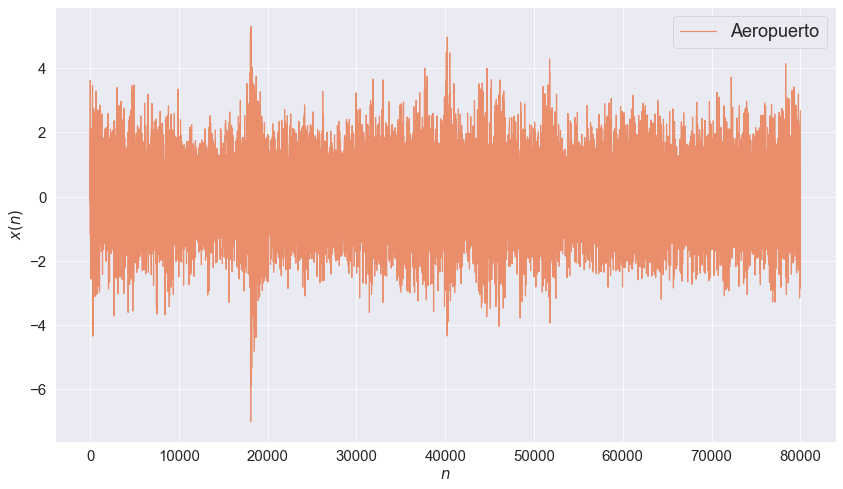

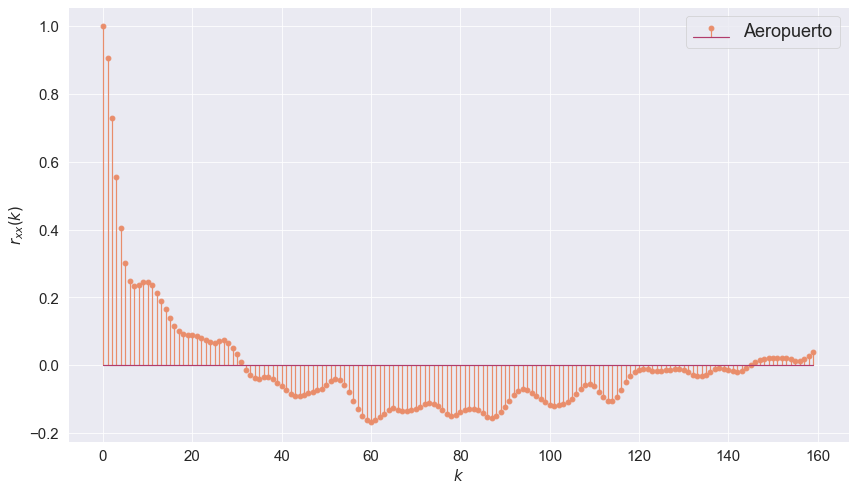

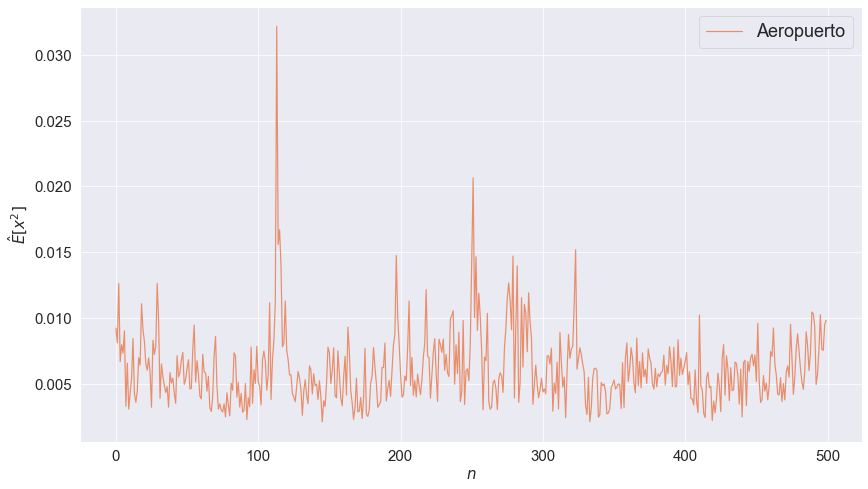

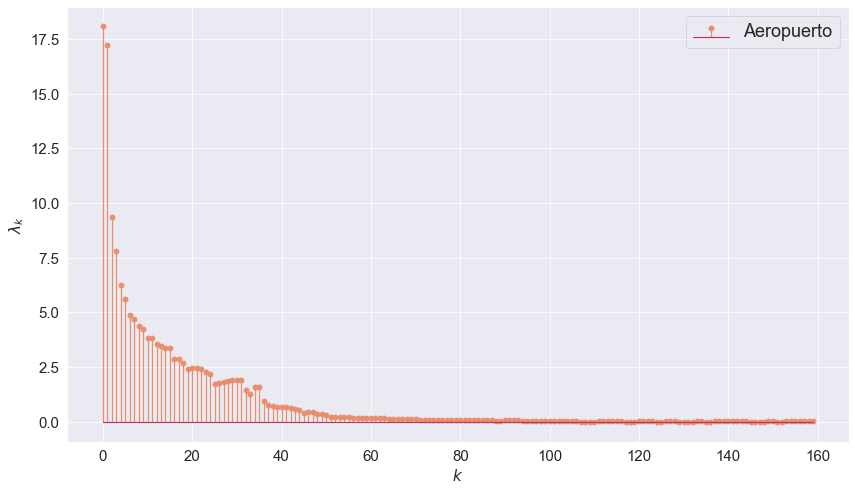

In [518]:
plot_all(signals, signals_paths, 0, 0, size)

## Auto

In [519]:
IPython.display.Audio(signals[1][1], rate=signals[1][0])

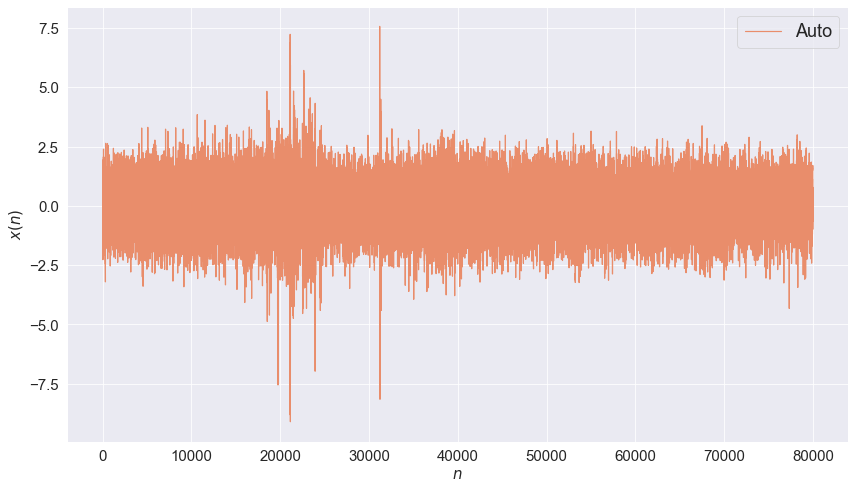

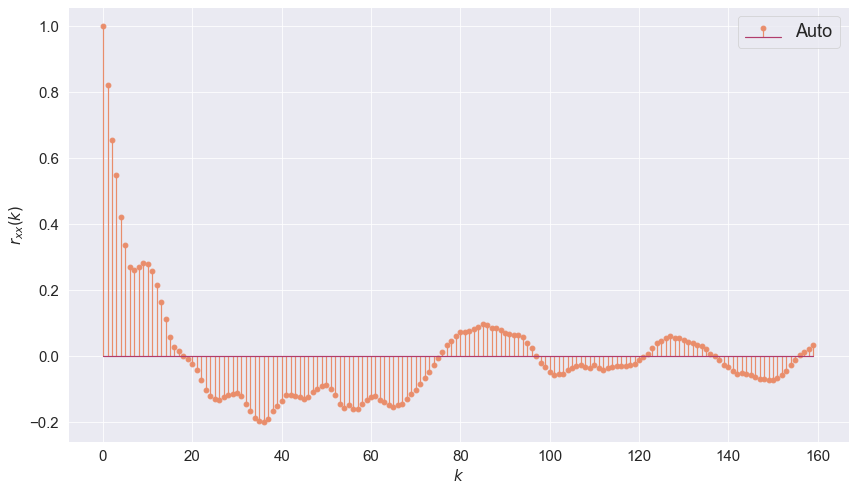

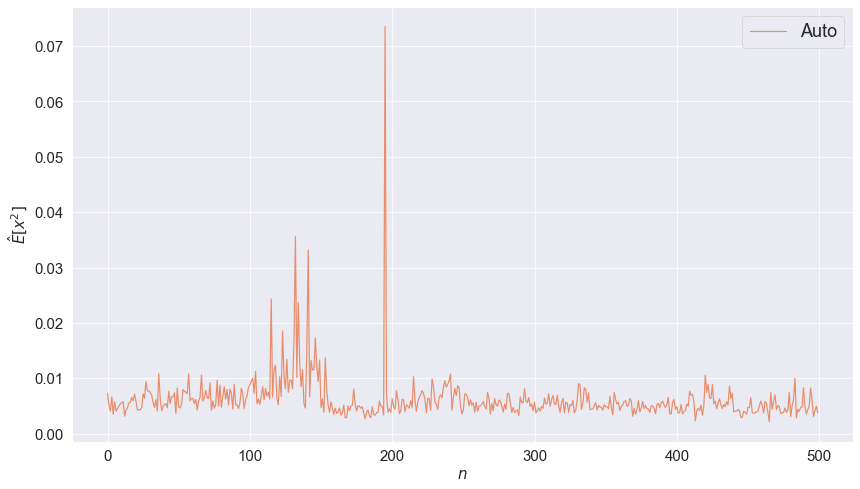

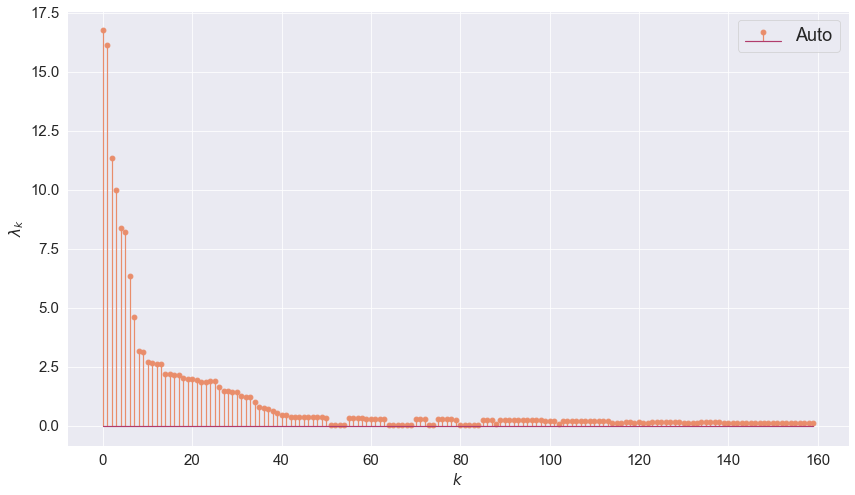

In [520]:
plot_all(signals, signals_paths, 1, 0, size)

## Exhibición

In [521]:
IPython.display.Audio(signals[2][1], rate=signals[2][0])

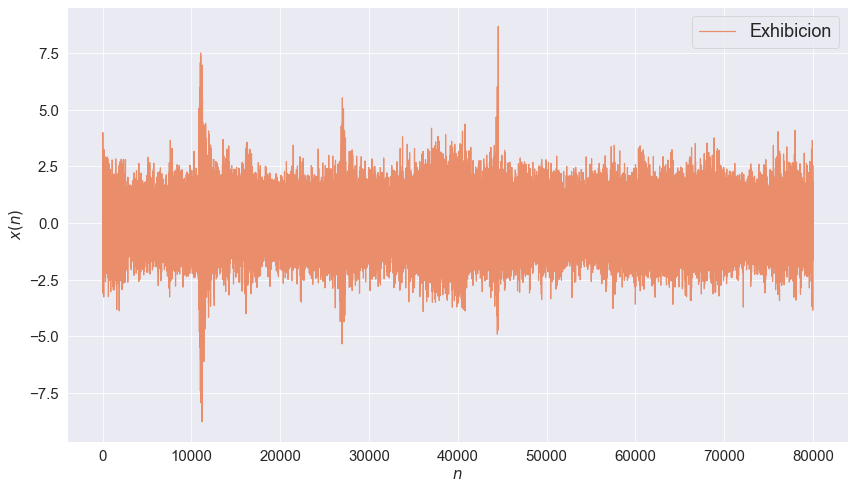

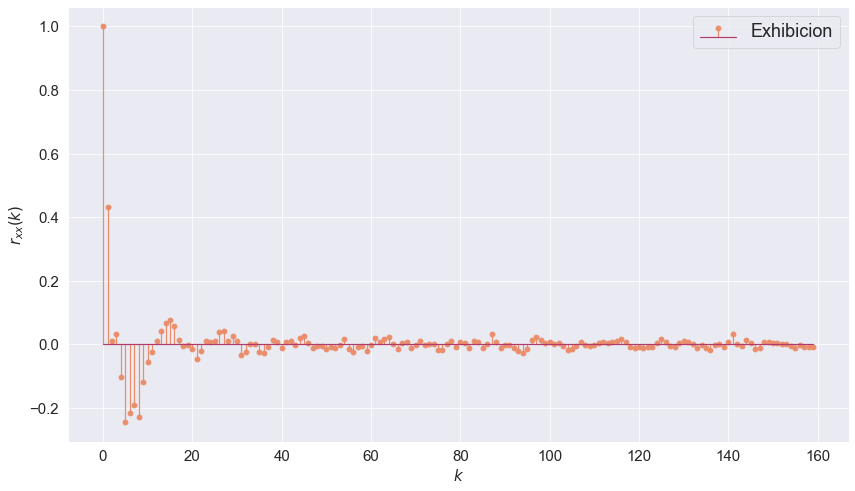

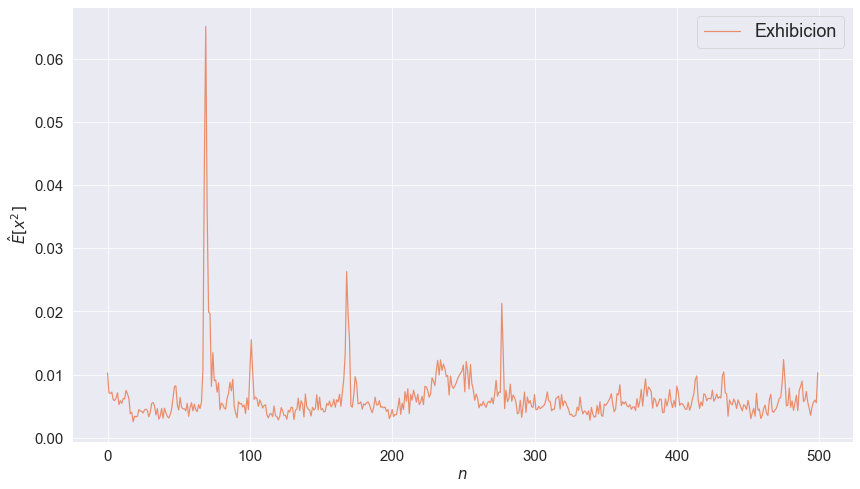

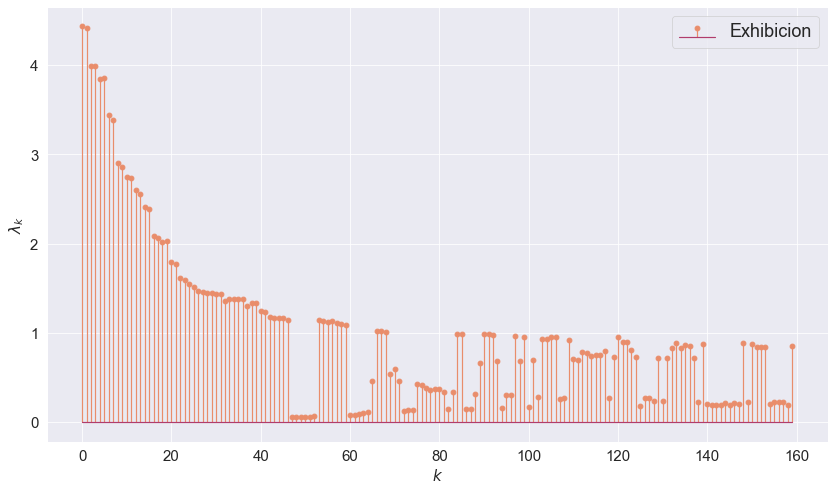

In [522]:
plot_all(signals, signals_paths, 2, 0, size)

## Restaurant

In [523]:
IPython.display.Audio(signals[3][1], rate=signals[3][0])

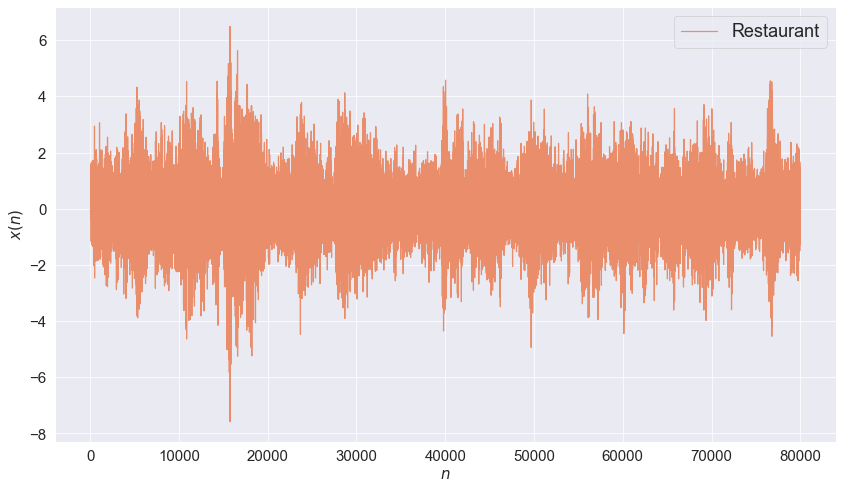

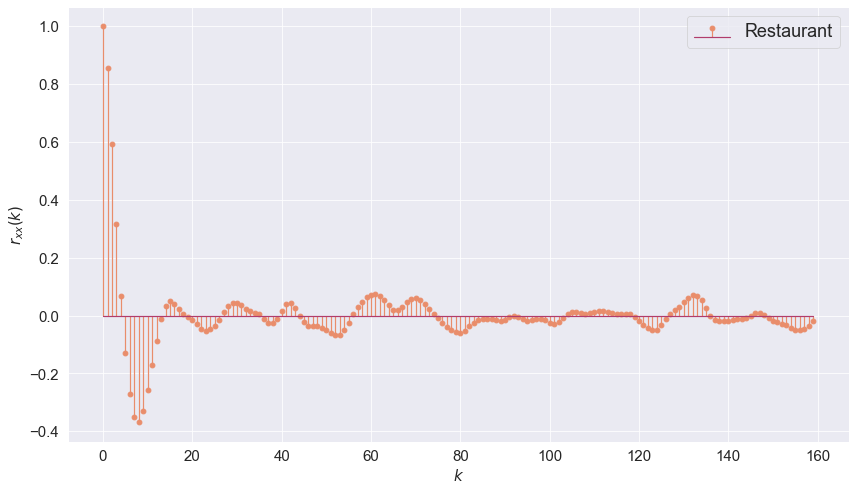

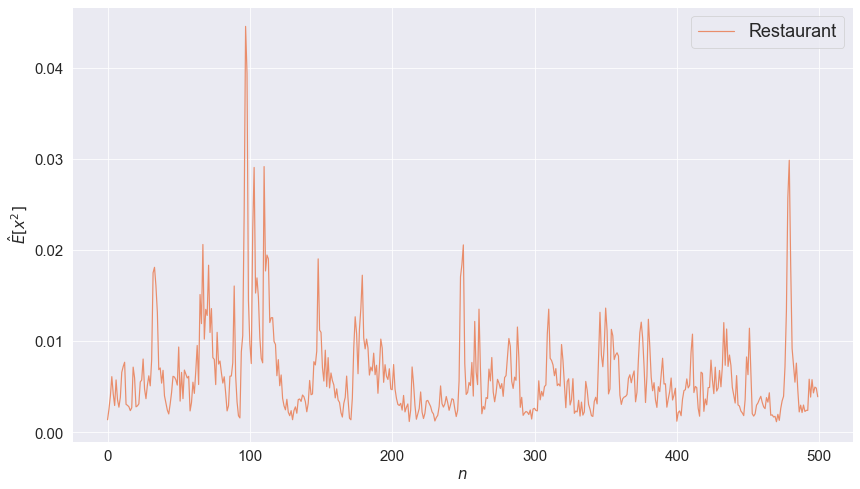

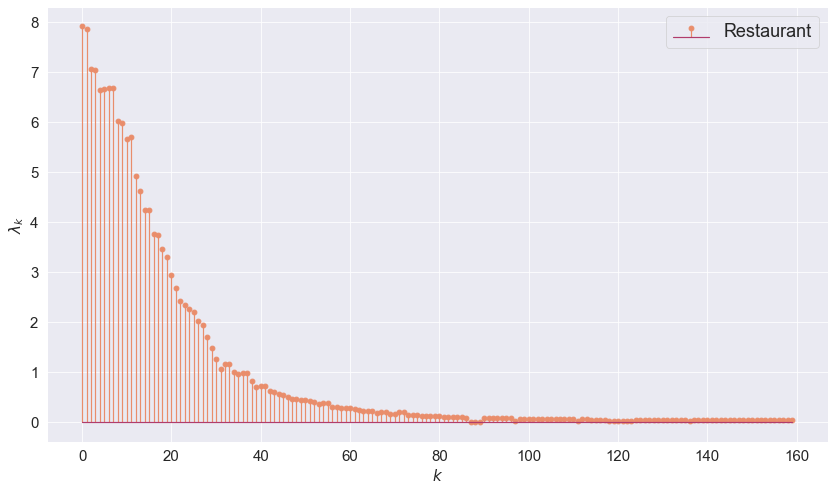

In [524]:
plot_all(signals, signals_paths, 3, 0, size)

## Calle

In [525]:
IPython.display.Audio(signals[4][1], rate=signals[4][0])

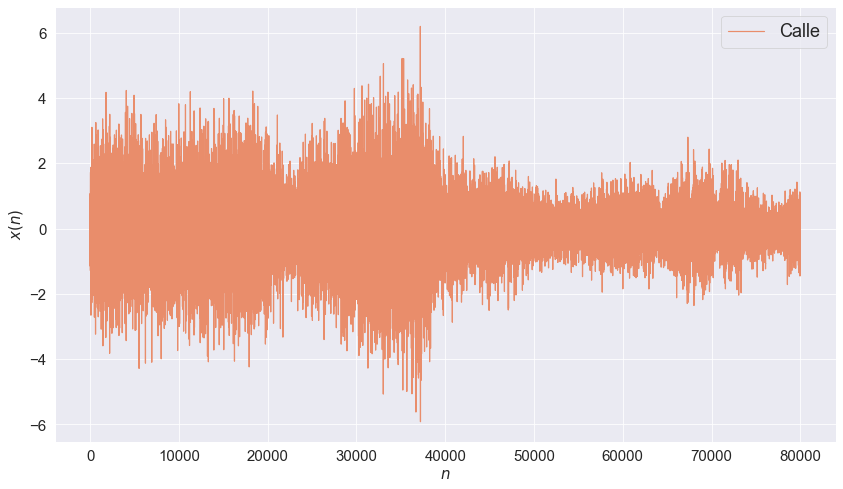

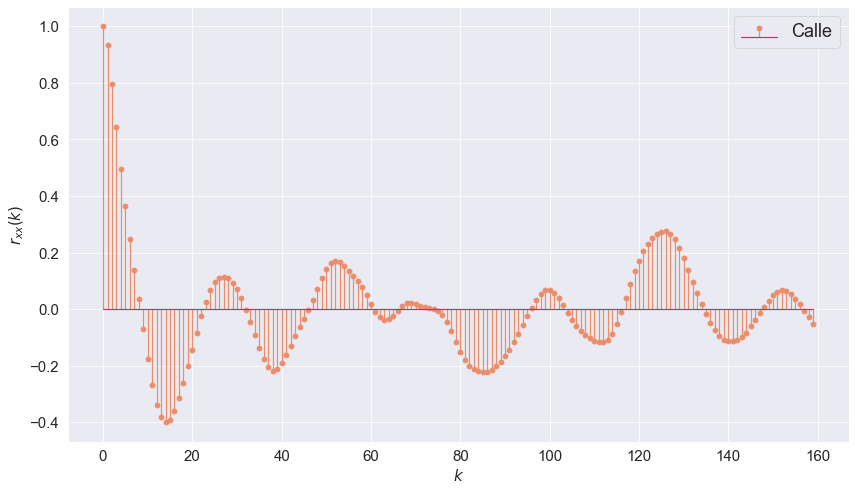

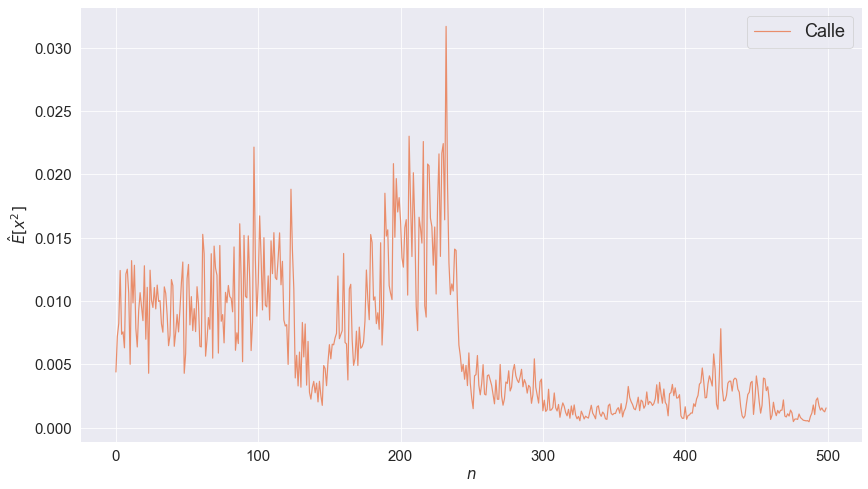

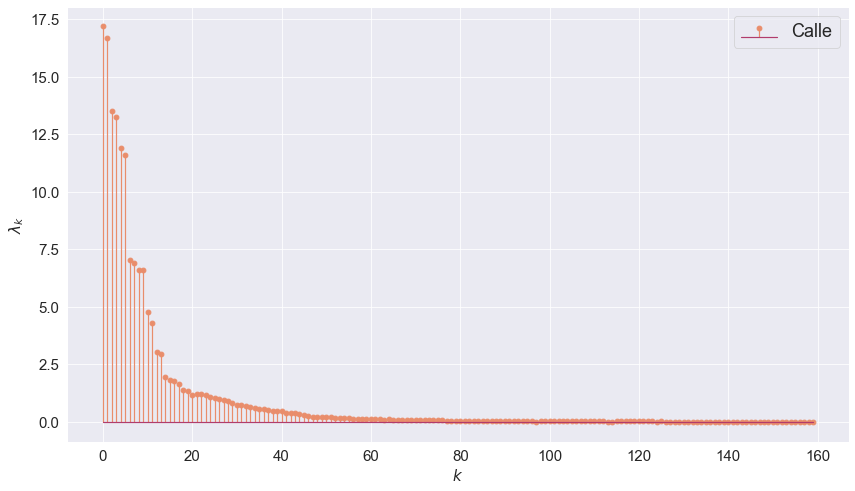

In [526]:
plot_all(signals, signals_paths, 4, 0, size)

## Subte

In [527]:
IPython.display.Audio(signals[5][1], rate=signals[5][0])

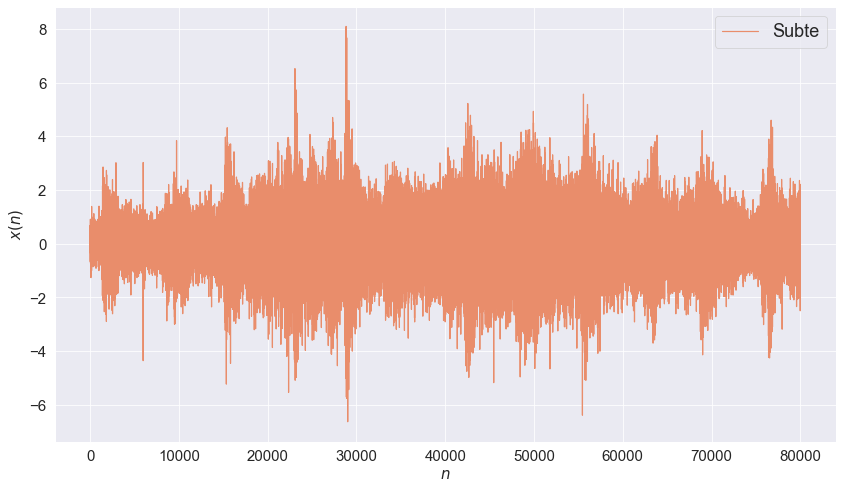

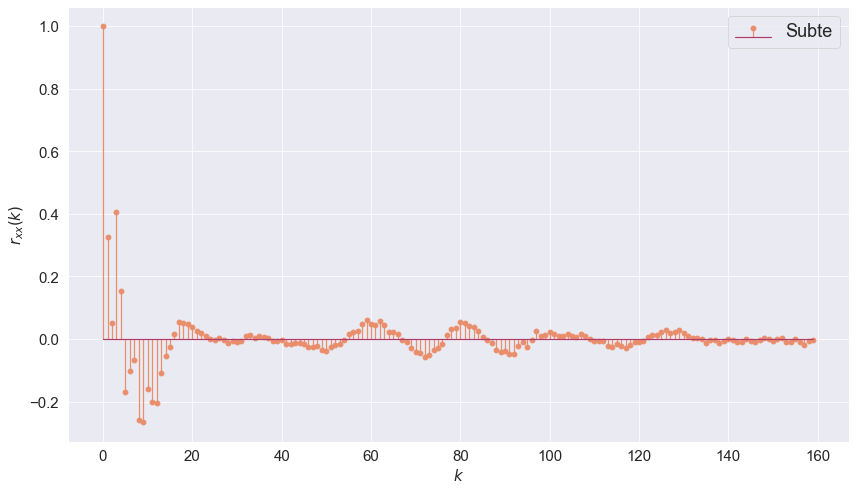

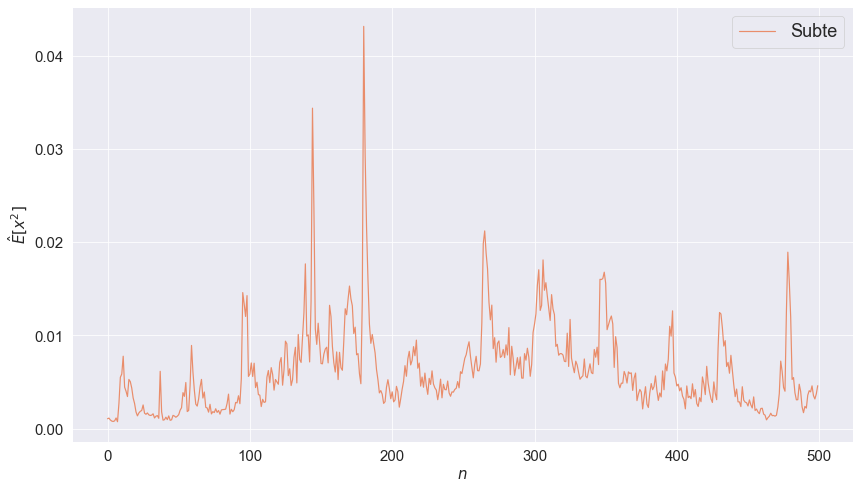

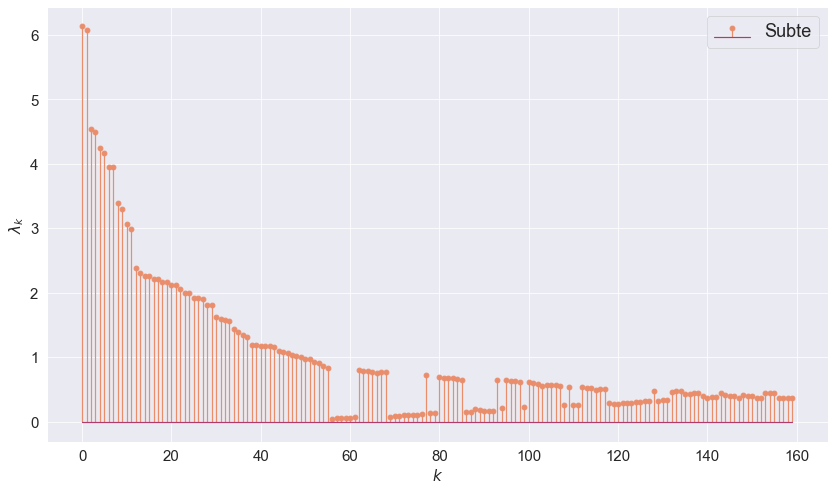

In [528]:
plot_all(signals, signals_paths, 5, 0, size)

## Tren

In [529]:
IPython.display.Audio(signals[6][1], rate=signals[6][0])

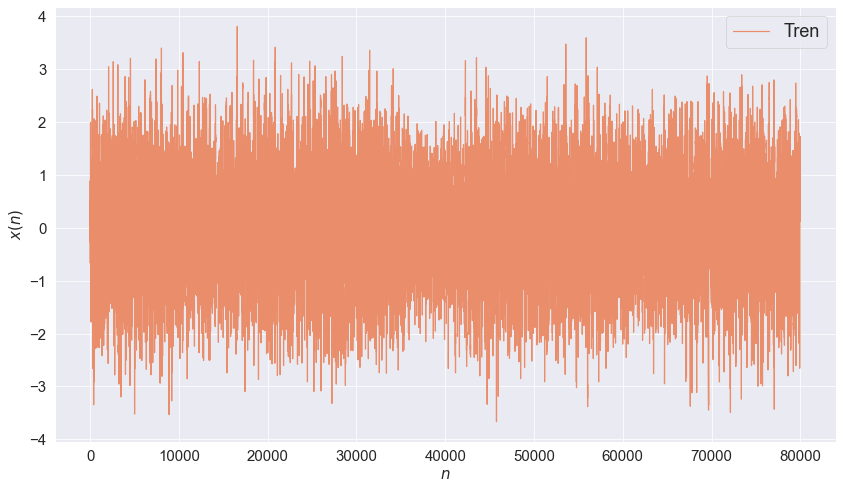

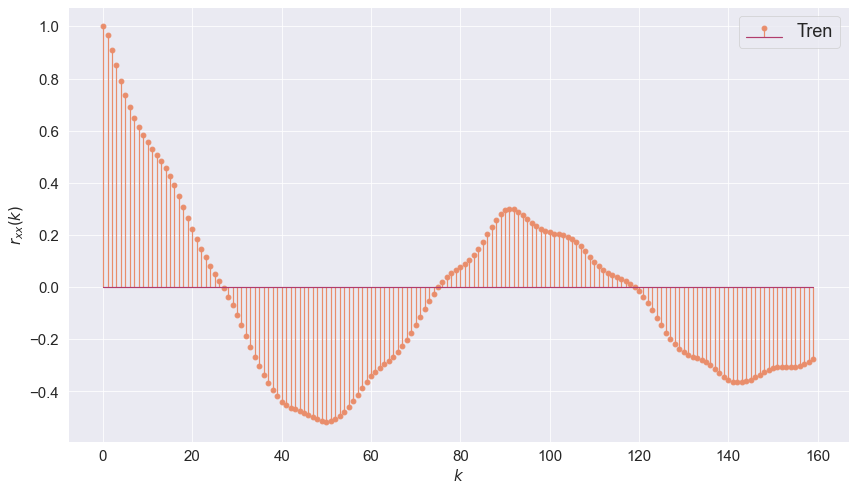

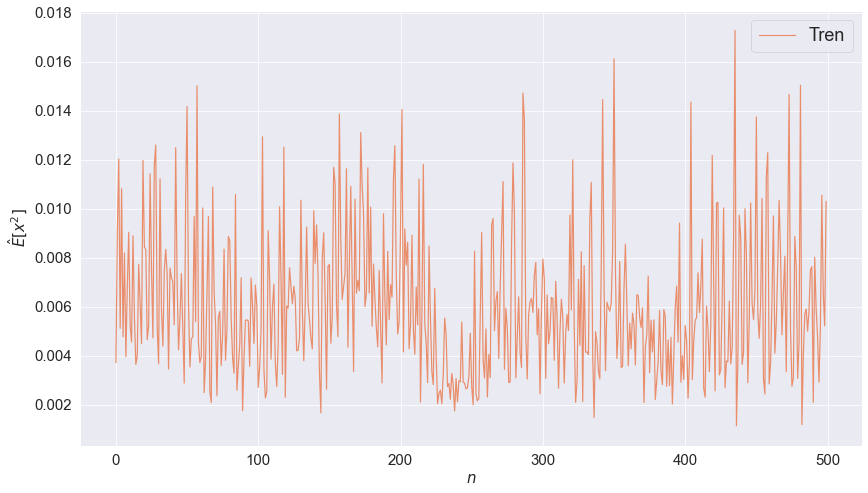

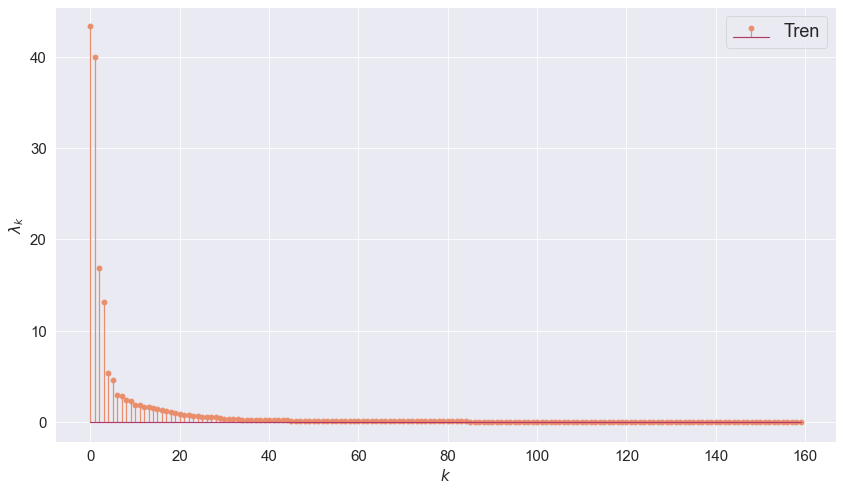

In [530]:
plot_all(signals, signals_paths, 6, 0, size)